In [1]:
import cv2
from colorthief import ColorThief, MMCQ
import tempfile
from PIL import Image
import numpy as np

import margo_loader
from ExtractorBaseClass import ExtractorBaseClass
from utils.Formatting import convert_pixel#, cvtColorWithAlpha
from utils.ImageFiles import read_img
# import multiprocessing as mp

In [2]:
class ColorThiefExtractor(ExtractorBaseClass):
    # https://github.com/fengsp/color-thief-py

    def __init__(self, img, color_count=20, quality=1):
        super(ColorThiefExtractor, self).__init__(img)
        self.quality = quality
        self.color_count = color_count

    def quantize(self):

        self.image = self.img
#         self.color_count = 20
#         self.quality = 1
        fp = tempfile.NamedTemporaryFile(delete=False,suffix=".png")
        cv2.imwrite(fp.name, cv2.cvtColor(self.image, cv2.COLOR_BGRA2RGBA))
        #print("Wrote to %s" % fp.name)

        # Image.fromarray(cv2.imread(fp.name)).show()
        thief = ColorThief(fp.name)

        thief.get_palette(color_count=self.color_count,quality=self.quality)

        # flatten and map everything
        pixels = np.array(self.image).reshape(self.image.shape[0] * self.image.shape[1], self.image.shape[2])

        cache = {}
        def map_color(color):
            idx = tuple(color)
            if idx not in cache: 
                cache[idx] = thief.cmap.nearest(color)
            r, g, b = cache[idx]
            return [r, g, b, 255]
        
        arr = np.uint8(np.array([map_color(x) for x in pixels]))
        ret = arr.reshape(self.image.shape)
        return ret

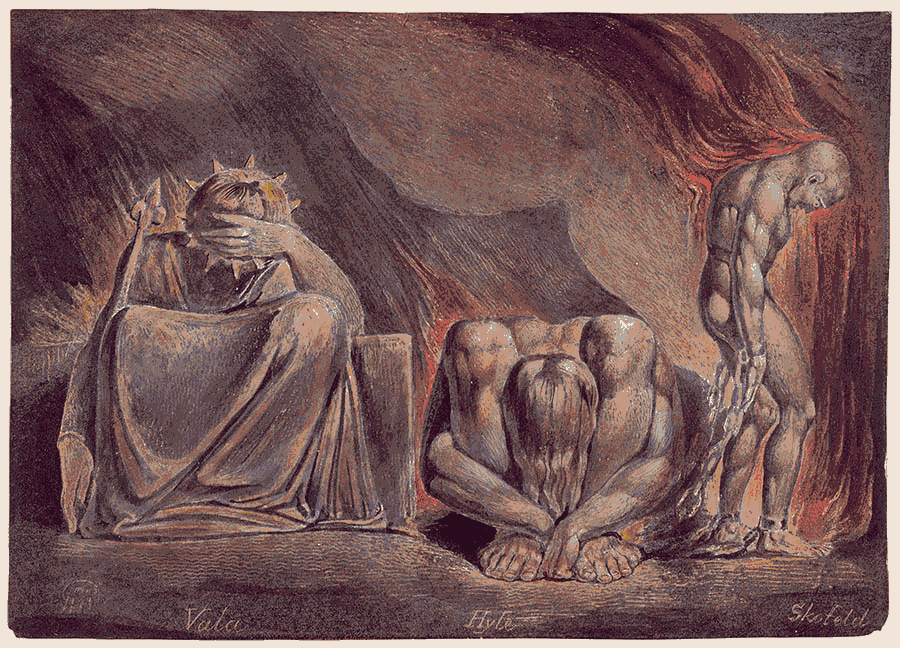

In [3]:
# :: ignore-cell ::
Image.fromarray( ColorThiefExtractor(read_img("../images/jerusalem.mpi.p22-51.100.jpg")).get_color_map())

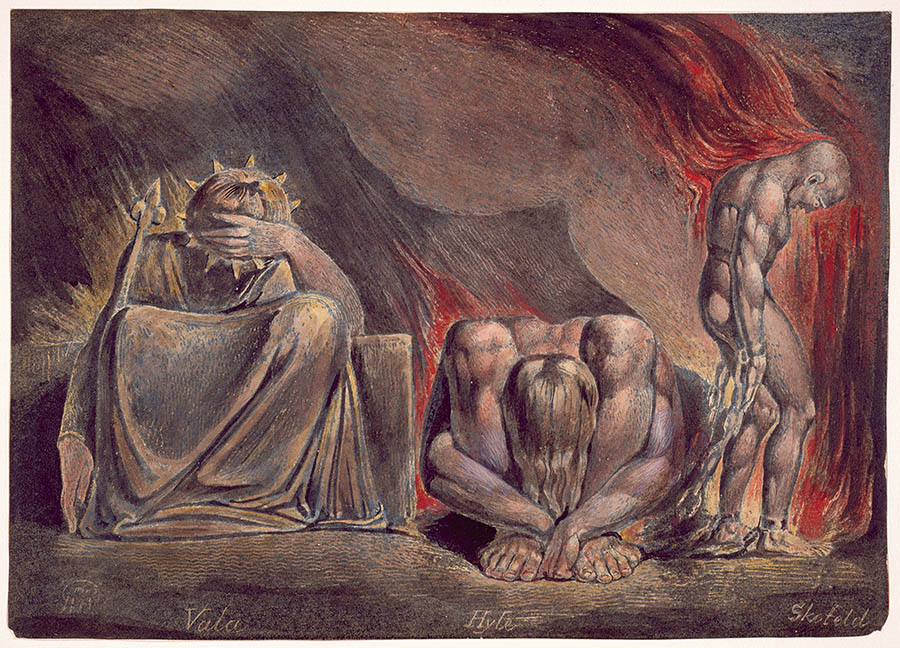

In [5]:
# :: ignore-cell ::
Image.fromarray(read_img("../images/jerusalem.mpi.p22-51.100.jpg"))